# **Furniture Sales Forecast**

## **Why are we doing it ?**
It will help buisness owners in terms of sales, profits, gain etc.
To find out the popularity of a certain product & how its sales can impact the buisness.

## **How it will help ?**
it will help to get insight into the past performance will reveal lot of components that will enable the buisness to identify the trends.

## **Buisness Objective** 
To build forecast model to predict the furniture sales of a certain store.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

#ARMA
from statsmodels.tsa.arima_model import ARIMA

#plots
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

#Ljung-box test for model goodness
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_salesdata =  pd.read_excel("/content/drive/MyDrive/ML/Data/DS3_C6_S4_TimeSeries_Sales_Data_Project.xls",index_col="Order Date",parse_dates=True)
df_salesdata

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-21,9990,CA-2014-110422,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2017-02-26,9991,CA-2017-121258,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
2017-02-26,9992,CA-2017-121258,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932


In [ ]:
#cheking the shape of dataframe
df_salesdata.shape

(9994, 20)

In [ ]:
#checking info
df_salesdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9994 entries, 2016-11-08 to 2017-05-04
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Pro

### There are no null values present in the data 

In [ ]:
df_salesdata.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df_salesdata.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
df_salesdata.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

### we can analyse different categories of products accordingly.In this we need analyize the furniture sales 

## Univariate Analysis

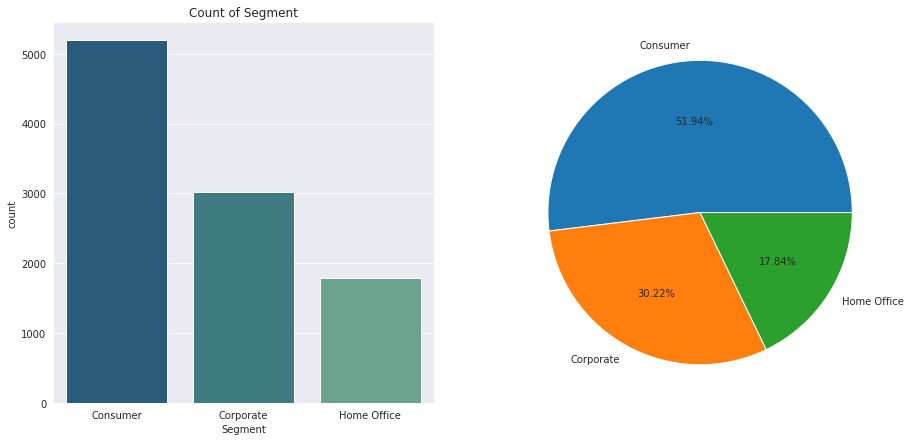

In [ ]:
#Segment Analysis
fig,ax = plt.subplots(1,2,figsize=(15,7))
ax[0].set_title("Count of Segment") 
percentage = df_salesdata["Segment"].value_counts()
labels = list(df_salesdata["Segment"].value_counts().index)

sns.countplot(x=df_salesdata["Segment"],ax=ax[0],palette = 'crest_r')
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")
plt.show() 

### Most of the customers are in Consumer Segment, followed by Corporate and lowest in Home Office

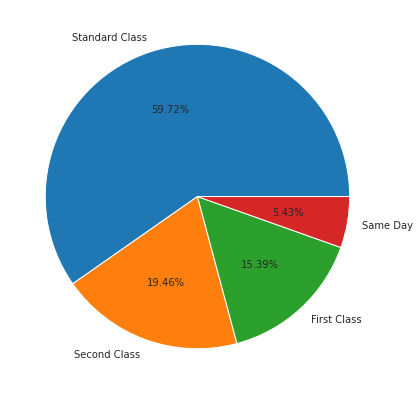

In [ ]:
#Shipping Mode Analysis
fig,ax = plt.subplots(figsize=(15,7))
percentage = df_salesdata["Ship Mode"].value_counts()
labels = list(df_salesdata["Ship Mode"].value_counts().index)
#sns.countplot(x=df_salesdata["Segment"],ax=ax[0],palette = 'crest_r')
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")
plt.show() 

### Most of the shipping happens via the Standard Class, followed by Second Class and First Class. Very little shipping happens via the Same Day

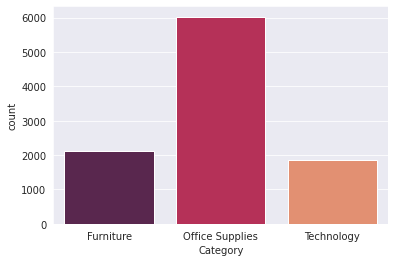

In [ ]:
#Region Analysis
sns.countplot(x=df_salesdata['Category'],palette='rocket')

### Bulk of the product sold is Office Supplies

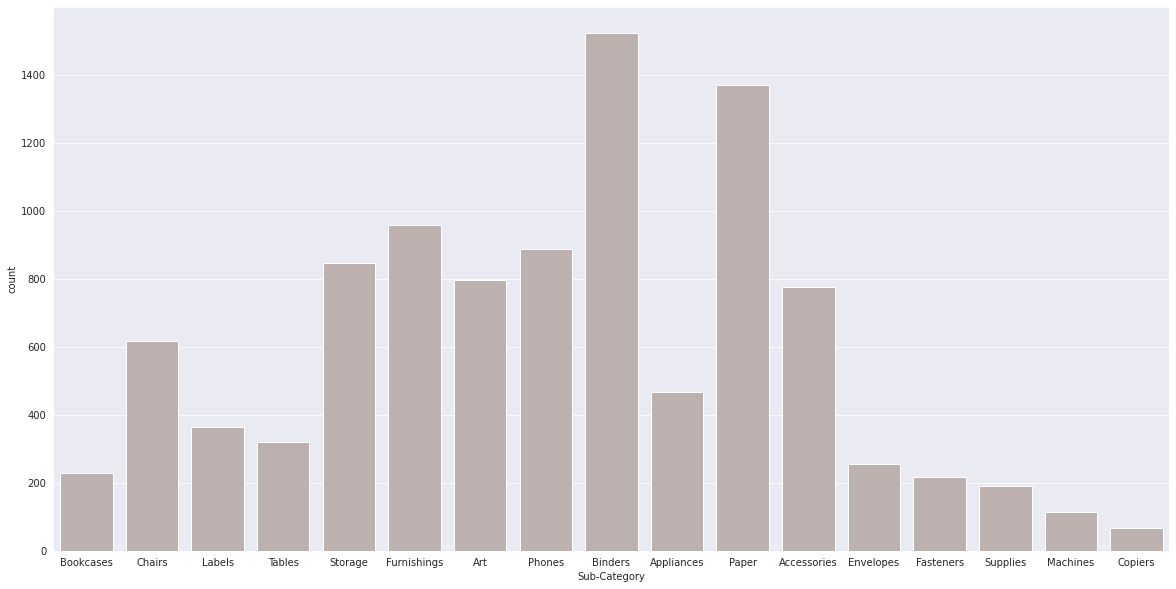

In [ ]:
#Sub-Category of Products Analysis
fig= plt.figure(figsize=(20,10))
sns.countplot(x ='Sub-Category', data = df_salesdata,
              color="salmon",
              saturation = 0.1)
# Show the plot
plt.show()


### Most of the products sold are Binders, Papers which should be the part of office supplies.

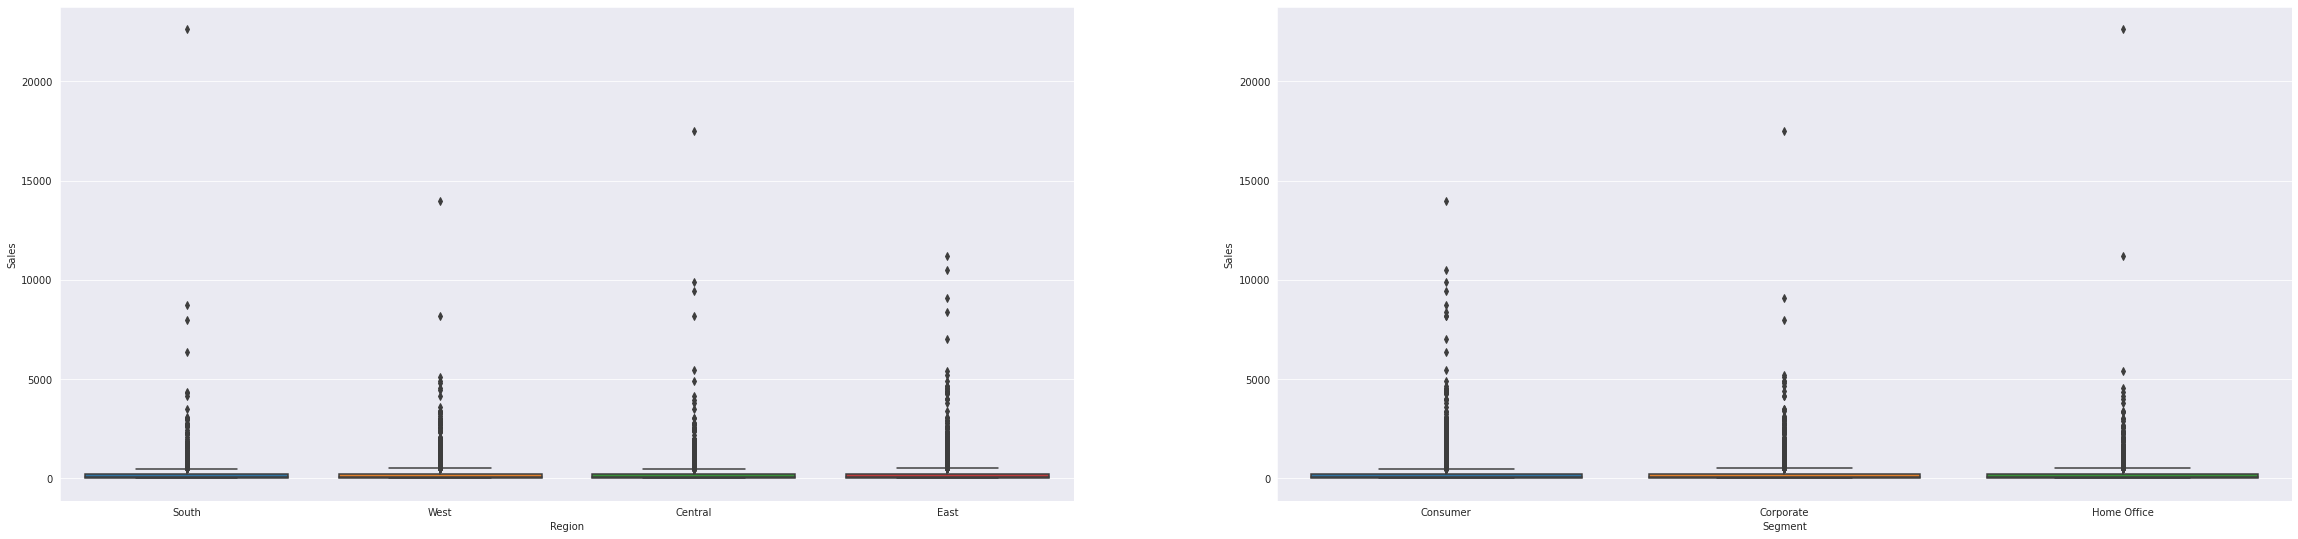

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(40,20))
plt.subplot(2,2,1)
sns.boxplot(x='Region',y='Sales',data=df_salesdata)
plt.subplot(2,2,2)
sns.boxplot(x='Segment',y='Sales',data=df_salesdata)


### 1.South region has highest sales 

### 2.Home office has highest sales 

In [ ]:
#we need to extract the furniture from the category
df_salesdata1 = df_salesdata[(df_salesdata.Category=='Furniture')]
df_salesdata_1 = df_salesdata1.copy()

In [ ]:
df_salesdata1 = df_salesdata1.groupby('Order Date')['Sales'].sum().reset_index()
df_salesdata1

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [ ]:
df_salesdata1 = df_salesdata1.set_index('Order Date')
df_salesdata1

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [ ]:
df_salesdata2 = df_salesdata1.resample('MS').mean()
df_salesdata2

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188
2014-06-01,695.059242
2014-07-01,601.169500
2014-08-01,457.521656
2014-09-01,992.353367


In [ ]:
df_salesdata2.shape

(48, 1)

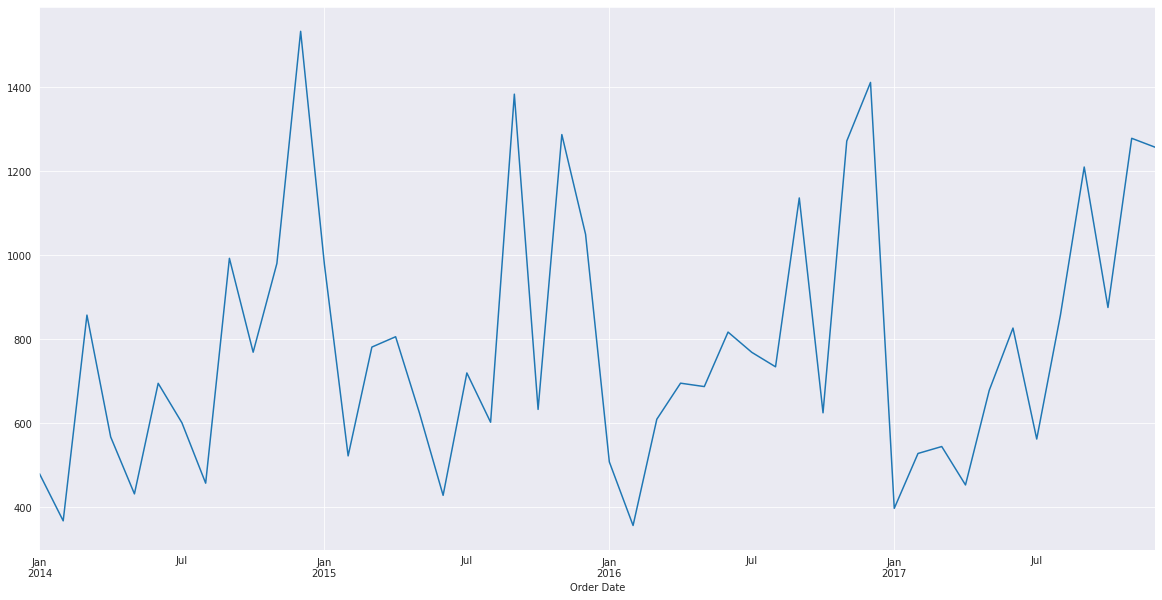

In [ ]:
df_salesdata2.Sales.plot(figsize=(20,10))

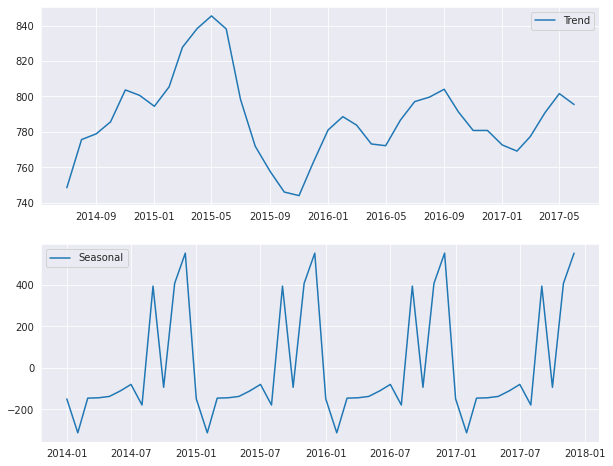

In [ ]:
#decompose the data to check for the TS compoennts 
decomp = seasonal_decompose(df_salesdata2.Sales)

d_seasonal = decomp.seasonal
d_trend = decomp.trend

#plot the trend and seasonal components
fig,ax=plt.subplots(2,1,figsize=(10,8))

plt.subplot(211)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(212)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

### There is trend and seasonality in data 

In [ ]:
ratio = 0.7
rows = int(ratio * len(df_salesdata2))

train = df_salesdata2[:rows]
test = df_salesdata2[rows:]

print("Total={}, Train={}, Test={}".format(len(df_salesdata2),len(train),len(test)))

Total=48, Train=33, Test=15


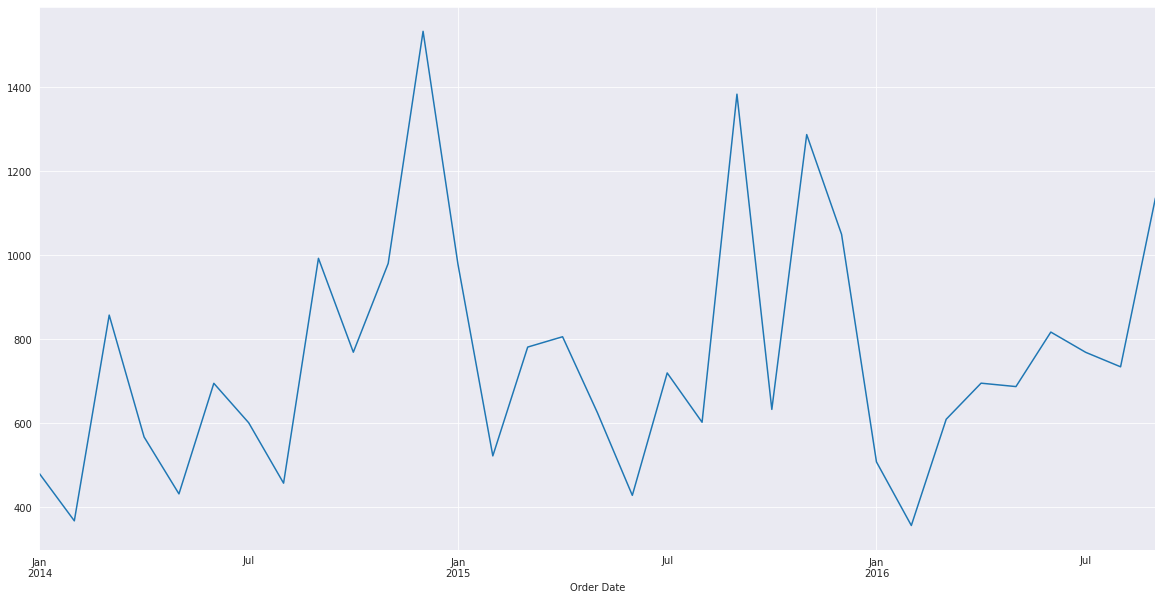

In [ ]:
train.Sales.plot(figsize=(20,10))

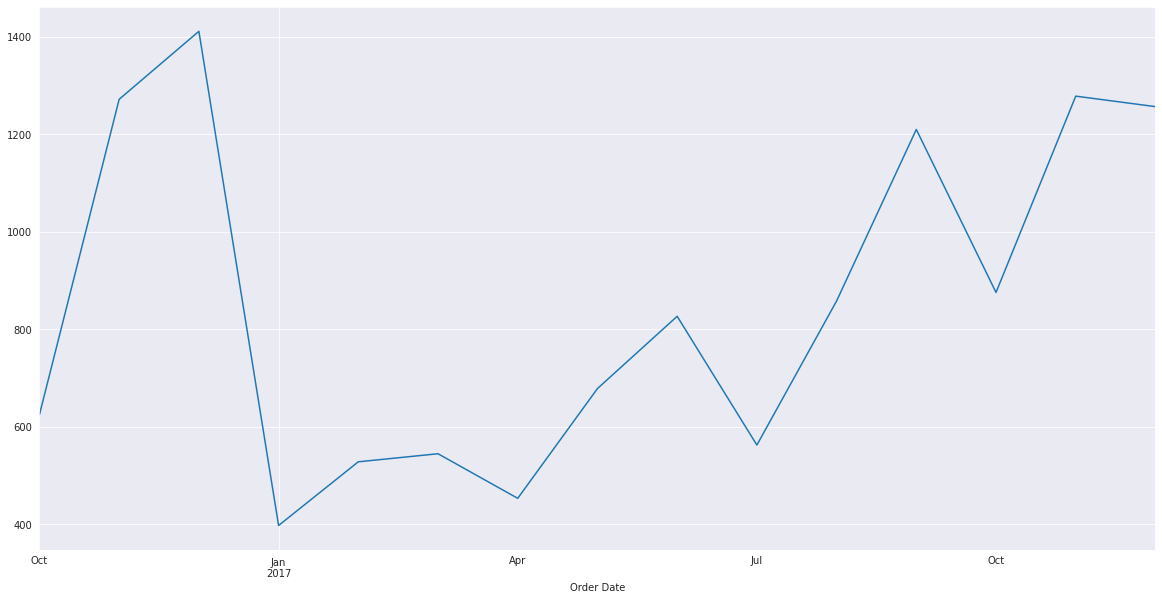

In [ ]:
test.Sales.plot(figsize=(20,10))

### Check data for stationarity.

In [ ]:
def checkStationarity (data):
  pvalue = adfuller(data)[1]
  if pvalue < 0.05:
    ret = "Data is stationary. Proceed to model building"
  else:
    ret = "Data is not stationary. Make it statioanry"
  return(ret)

In [ ]:
checkStationarity(df_salesdata2.Sales)

'Data is stationary. Proceed to model building'

In [ ]:
# check the data for stationarity
checkStationarity(train.Sales)

'Data is stationary. Proceed to model building'

In [ ]:
'''#1-level difference
diff_data_te = test['Sales']-test['Sales'].shift()
diff_data_te.dropna(inplace=True)'''

"#1-level difference\ndiff_data_te = test['Sales']-test['Sales'].shift()\ndiff_data_te.dropna(inplace=True)"

In [ ]:
'''#1-level difference
diff_data_tr = train['Sales']-train['Sales'].shift()
diff_data_tr.dropna(inplace=True)'''

"#1-level difference\ndiff_data_tr = train['Sales']-train['Sales'].shift()\ndiff_data_tr.dropna(inplace=True)"

### Plot ACF and PACF 

Text(0.5, 1.0, 'Auto Correlation Fuction')

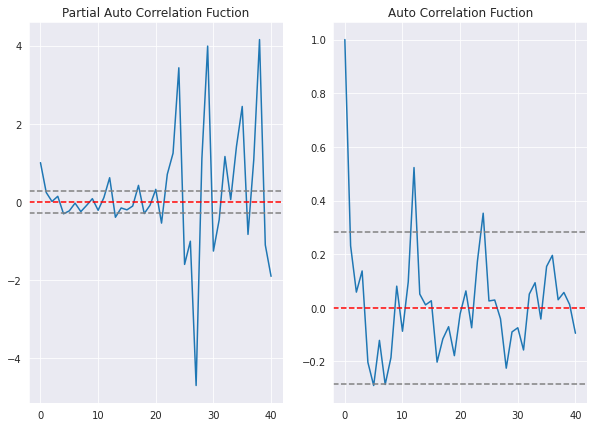

In [ ]:
sales_acf = acf(df_salesdata2.Sales)   
sales_pacf = pacf(df_salesdata2.Sales)
N = len(df_salesdata2.Sales)
SE = 1.96/np.sqrt(len(df_salesdata2.Sales))

#plot the ACF/PACF
fig,ax = plt.subplots(figsize= (10,7))

plt.subplot(121)
plt.plot(sales_pacf)
plt.axhline(y=0, linestyle = "--",color = "red")
plt.axhline(y=SE,linestyle="--",color="gray")
plt.axhline(y=-SE,linestyle="--",color="gray")
plt.title("Partial Auto Correlation Fuction")

plt.subplot(122)
plt.plot(sales_acf)
plt.axhline(y=0, linestyle = "--",color = "red")
plt.axhline(y=SE,linestyle="--",color="gray")
plt.axhline(y=-SE,linestyle="--",color="gray")
plt.title("Auto Correlation Fuction")


In [ ]:
p= np.arange(8)
q=np.arange(2)
print(p,q)

[0 1 2 3 4 5 6 7] [0 1]


## ARMA Model

In [ ]:
l=[0,1,2,3,4,5,6,7]
l1 = [0,1]
d=0
P1 = []
Q1 = []
MSE1=[]
RMSE1 = []
list1 = []
for i in l:
  for j in l1:
    P1.append(i)
    Q1.append(j)

    m1 = ARIMA(train,order=(i,0,j)).fit()

    aic1,bic1 = np.round(m1.aic,2),np.round(m1.bic,2)
    print("Model 1:AIC={},BIC={}".format(aic1,bic1))

    pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1])[1]

    if pvalue < 0.05:
      print("Not good model")
    else:
      print("Good model")

    #forecast on the test data 
    f1 = m1.predict(start=0,end=len(test)-1)

    #store actual and predicted data in dataframe
    actual = [] ; pred = []

    for k in range(len(f1)):
      actual.append(test.Sales[k])
      pred.append(f1[k])

    df1 = pd.DataFrame({'actual':actual,'forecast':pred})
    df1['error'] = df1.actual-df1.forecast
    print(df1)
    list1.append(df1)

    #calculate the MSE
    mse1 = mean_squared_error(df1.actual,df1.forecast)
    print("ARMA Model 1. p={},q={}\n\tMSE = {}\n\tRMSE ={}".format(i,j,mse1,np.sqrt(mse1)))
    MSE1.append(mse1)
    rmse = np.sqrt(mse1)
    RMSE1.append(rmse)

Model 1:AIC=470.14,BIC=473.13
Good model
         actual    forecast       error
0    624.872474  753.365432 -128.492959
1   1271.345152  753.365432  517.979720
2   1410.719808  753.365432  657.354375
3    397.602133  753.365432 -355.763299
4    528.179800  753.365432 -225.185632
5    544.672240  753.365432 -208.693192
6    453.297905  753.365432 -300.067527
7    678.302328  753.365432  -75.063104
8    826.460291  753.365432   73.094859
9    562.524857  753.365432 -190.840575
10   857.881889  753.365432  104.516456
11  1209.508583  753.365432  456.143151
12   875.362728  753.365432  121.997296
13  1277.817759  753.365432  524.452326
14  1256.298672  753.365432  502.933240
ARMA Model 1. p=0,q=0
	MSE = 122470.72078417001
	RMSE =349.9581700491789
Model 1:AIC=471.08,BIC=475.57
Good model
         actual    forecast       error
0    624.872474  754.374463 -129.501989
1   1271.345152  706.551171  564.793981
2   1410.719808  693.458204  717.261603
3    397.602133  783.876446 -386.274313
4    

In [ ]:
len(list1)

16

In [ ]:
pd.DataFrame({'P': P1,'q':Q1,'MSE':MSE1,'RMSE':RMSE1})

,P,q,MSE,RMSE
0,0,0,122470.720784,349.958170
1,0,1,130969.309981,361.896822
2,1,0,129375.286197,359.687762
3,1,1,130690.885342,361.511944
4,2,0,127417.539633,356.955935
5,2,1,130378.649279,361.079838
6,3,0,123063.013847,350.803383
7,3,1,120702.815122,347.423107
8,4,0,121142.281776,348.054998
9,4,1,135581.925954,368.214511


### The least MSE and RMSE value is for p=3 and q=1

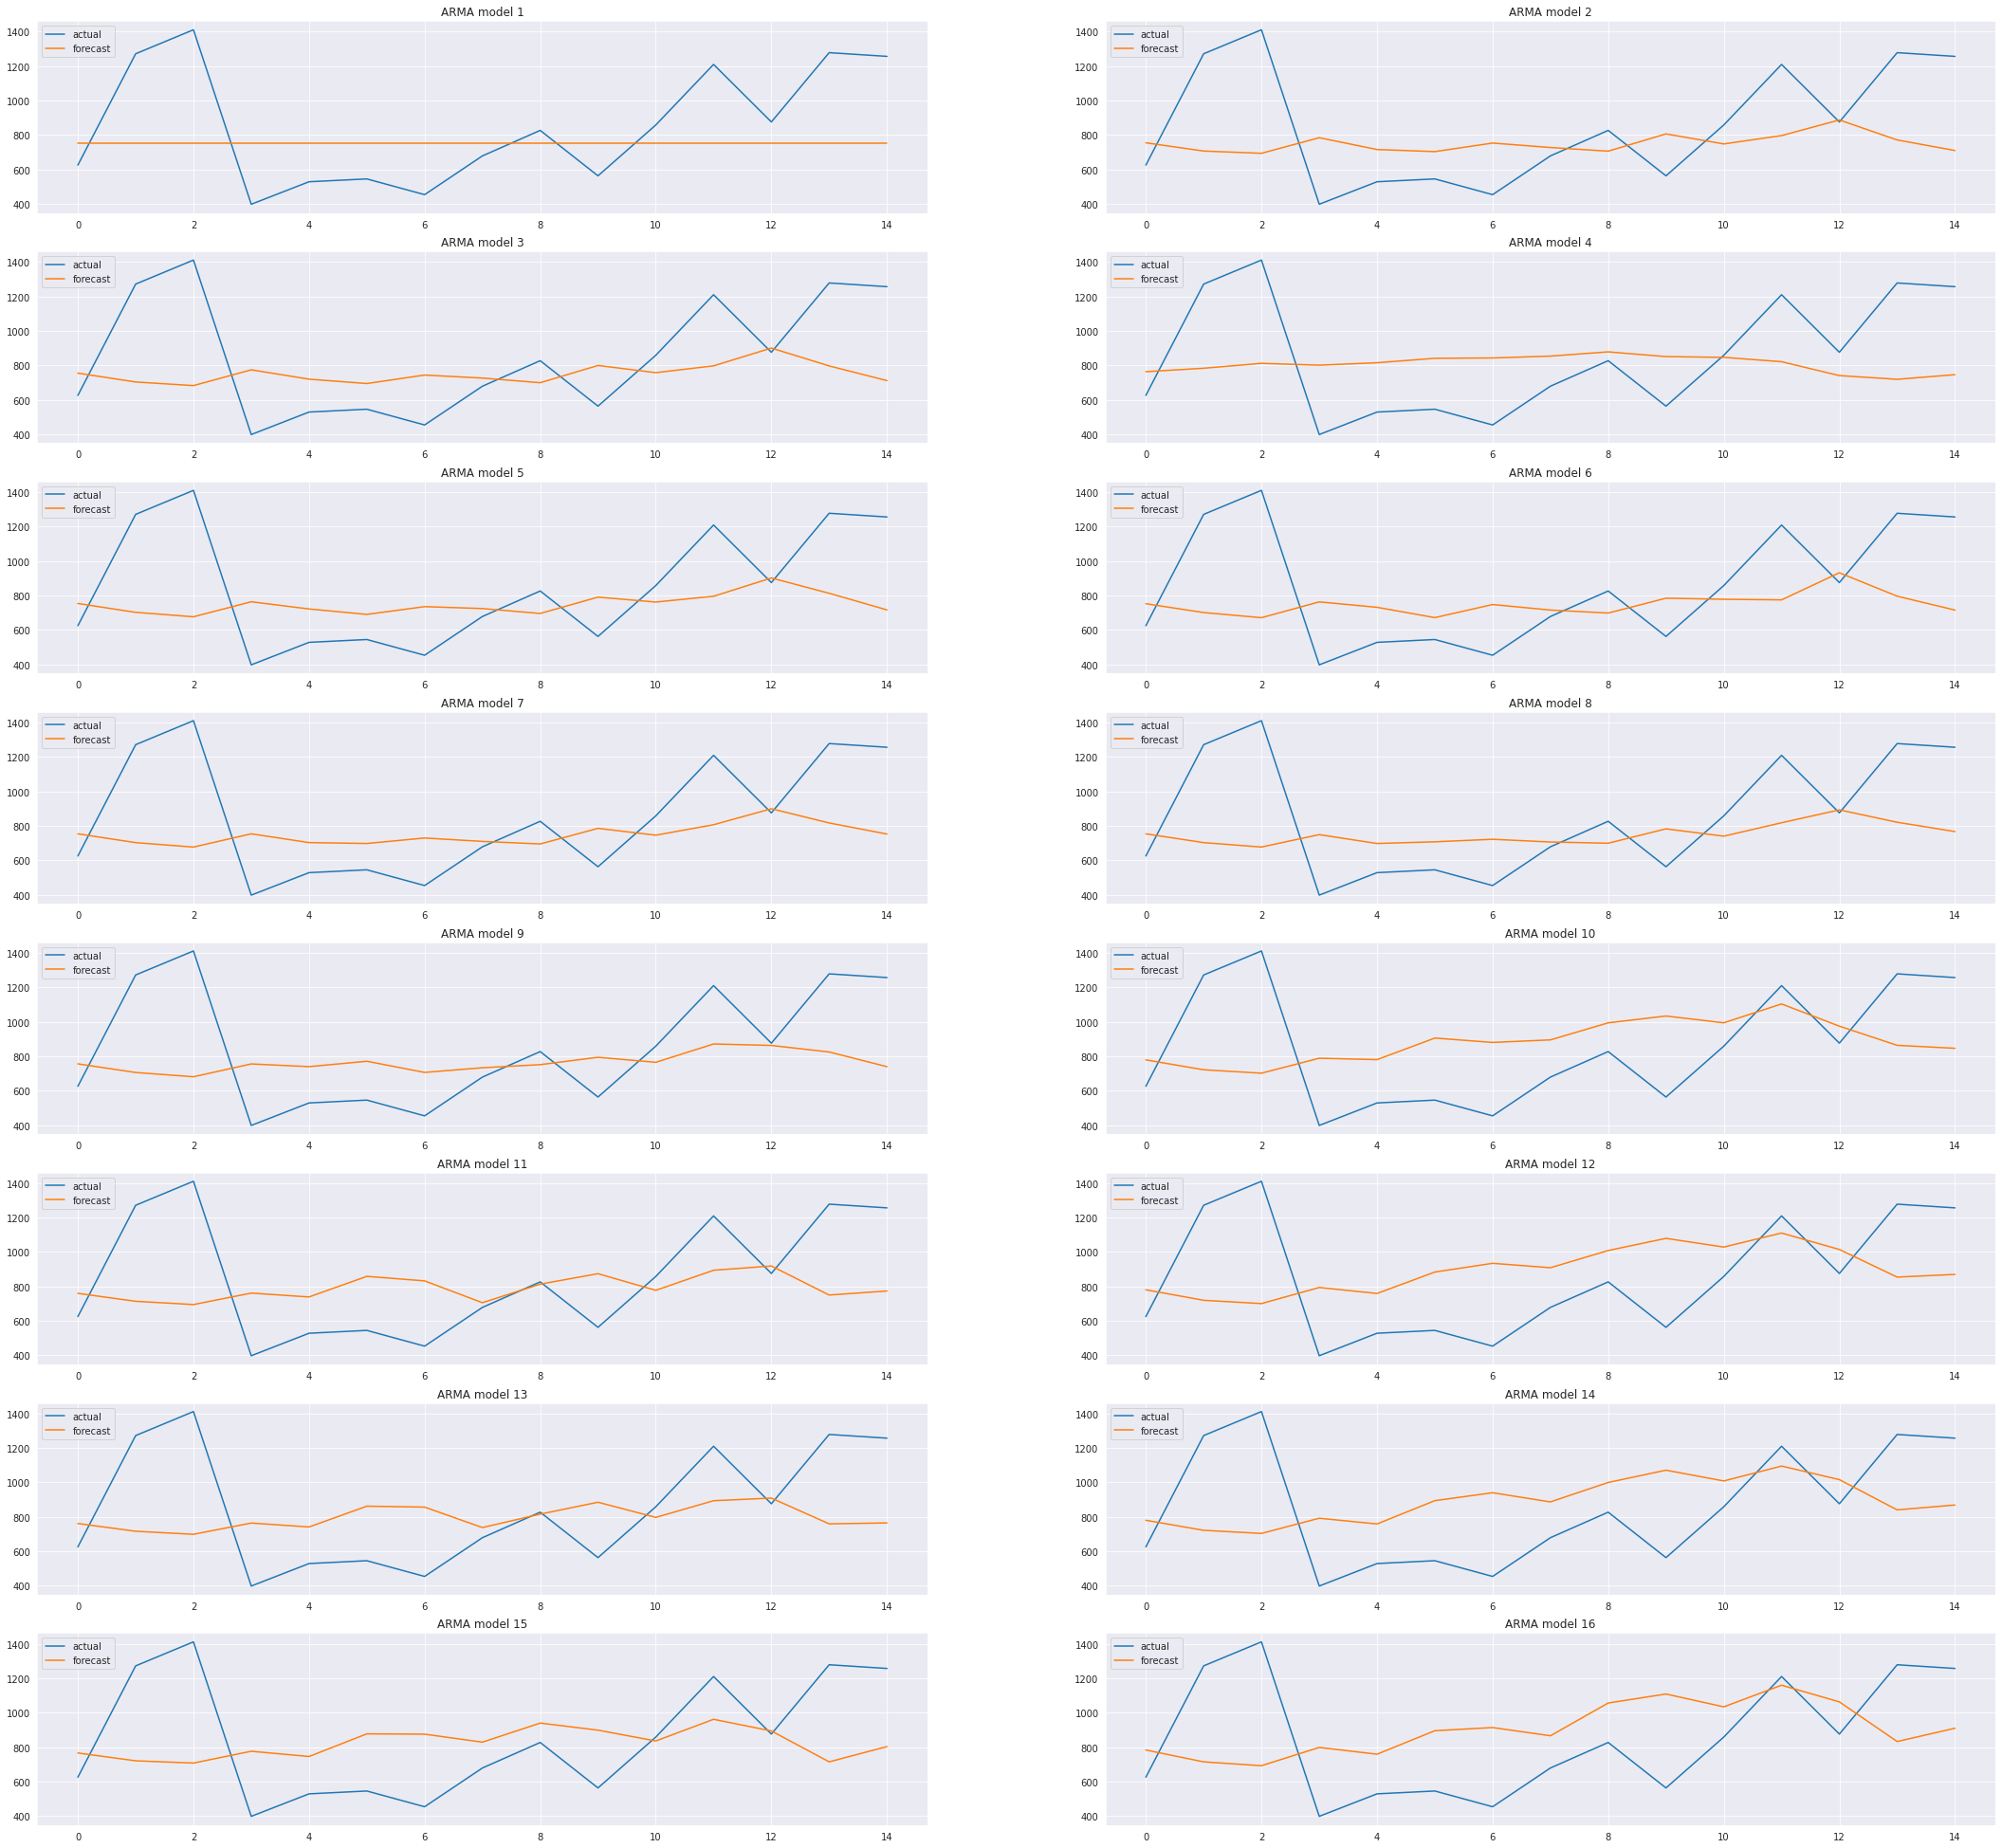

In [ ]:
c=1
for i in range(16):
  plt.subplot(8,2,c)
  list1[i].actual.plot(figsize=(37,35),legend=True)
  list1[i].forecast.plot(legend=True)
  plt.title("ARMA model "+str(c))
  c+=1

## ARIMA Model

In [ ]:
l=[0,1,2,4,5,6,7]
l1 = [0,1]
d=1
P2 = []
Q2 = []
MSE2=[]
RMSE2 = []
list2 = []
for i in l:
  for j in l1:
    P2.append(i)
    Q2.append(j)

    m1 = ARIMA(train.Sales,order=(i,d,j)).fit()

    #get teh AIC/BIC scores
    aic1,bic1 = np.round(m1.aic,2),np.round(m1.bic,2)
    print("Model 1:AIC={},BIC{}".format(aic1,bic1))

    pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1])[1]                                
    if pvalue < 0.05:
      print("Not good model")
    else:
      print("Good model")

    start = len(train); end=len(train)+len(test)-1
    print("start={},end={}".format(start,end))

    f1 = m1.predict(start,end,typ="levels")

    actual = [] ; pred = []

    for k in range(len(f1)):
      actual.append(test.Sales[k])
      pred.append(f1[k])

    df1 = pd.DataFrame({'actual':actual,'forecast':pred})
    df1['error'] = df1.actual-df1.forecast
    print(df1)
    list2.append(df1)

    mse = mean_squared_error(df1.actual,df1.forecast)
    print("ARIMA Model. p={},q={}\n\tMSE = {}\n\tRMSE ={}".format(i,j,mse,np.sqrt(mse)))
    MSE2.append(mse)
    rmse = np.sqrt(mse)
    RMSE2.append(rmse)

Model 1:AIC=471.16,BIC474.09
Not good model
start=33,end=47
         actual     forecast       error
0    624.872474  1156.445844 -531.573370
1   1271.345152  1176.938317   94.406835
2   1410.719808  1197.430790  213.289017
3    397.602133  1217.923263 -820.321130
4    528.179800  1238.415736 -710.235936
5    544.672240  1258.908210 -714.235970
6    453.297905  1279.400683 -826.102778
7    678.302328  1299.893156 -621.590828
8    826.460291  1320.385629 -493.925338
9    562.524857  1340.878102 -778.353245
10   857.881889  1361.370575 -503.488686
11  1209.508583  1381.863048 -172.354465
12   875.362728  1402.355521 -526.992793
13  1277.817759  1422.847995 -145.030236
14  1256.298672  1443.340468 -187.041796
ARIMA Model. p=0,q=0
	MSE = 304002.2440821862
	RMSE =551.363985115265
Model 1:AIC=461.3,BIC465.7
Good model
start=33,end=47
         actual    forecast       error
0    624.872474  841.025624 -216.153150
1   1271.345152  846.715418  424.629734
2   1410.719808  852.405213  558.314595


In [ ]:
pd.DataFrame({'P': P2,'q':Q2,'MSE':MSE2,'RMSE':RMSE2})

,P,q,MSE,RMSE
0,0,0,304002.244082,551.363985
1,0,1,109390.161748,330.741835
2,1,0,200712.603377,448.009602
3,1,1,111265.485477,333.564815
4,2,0,156152.813927,395.161757
5,2,1,110454.274470,332.346618
6,4,0,152553.987341,390.581601
7,4,1,104027.939017,322.533625
8,5,0,131589.546957,362.752735
9,5,1,101770.400616,319.014734


### The least MSE and RMSE value is for P=7 and q=1 and d=1 for ARIMA model.

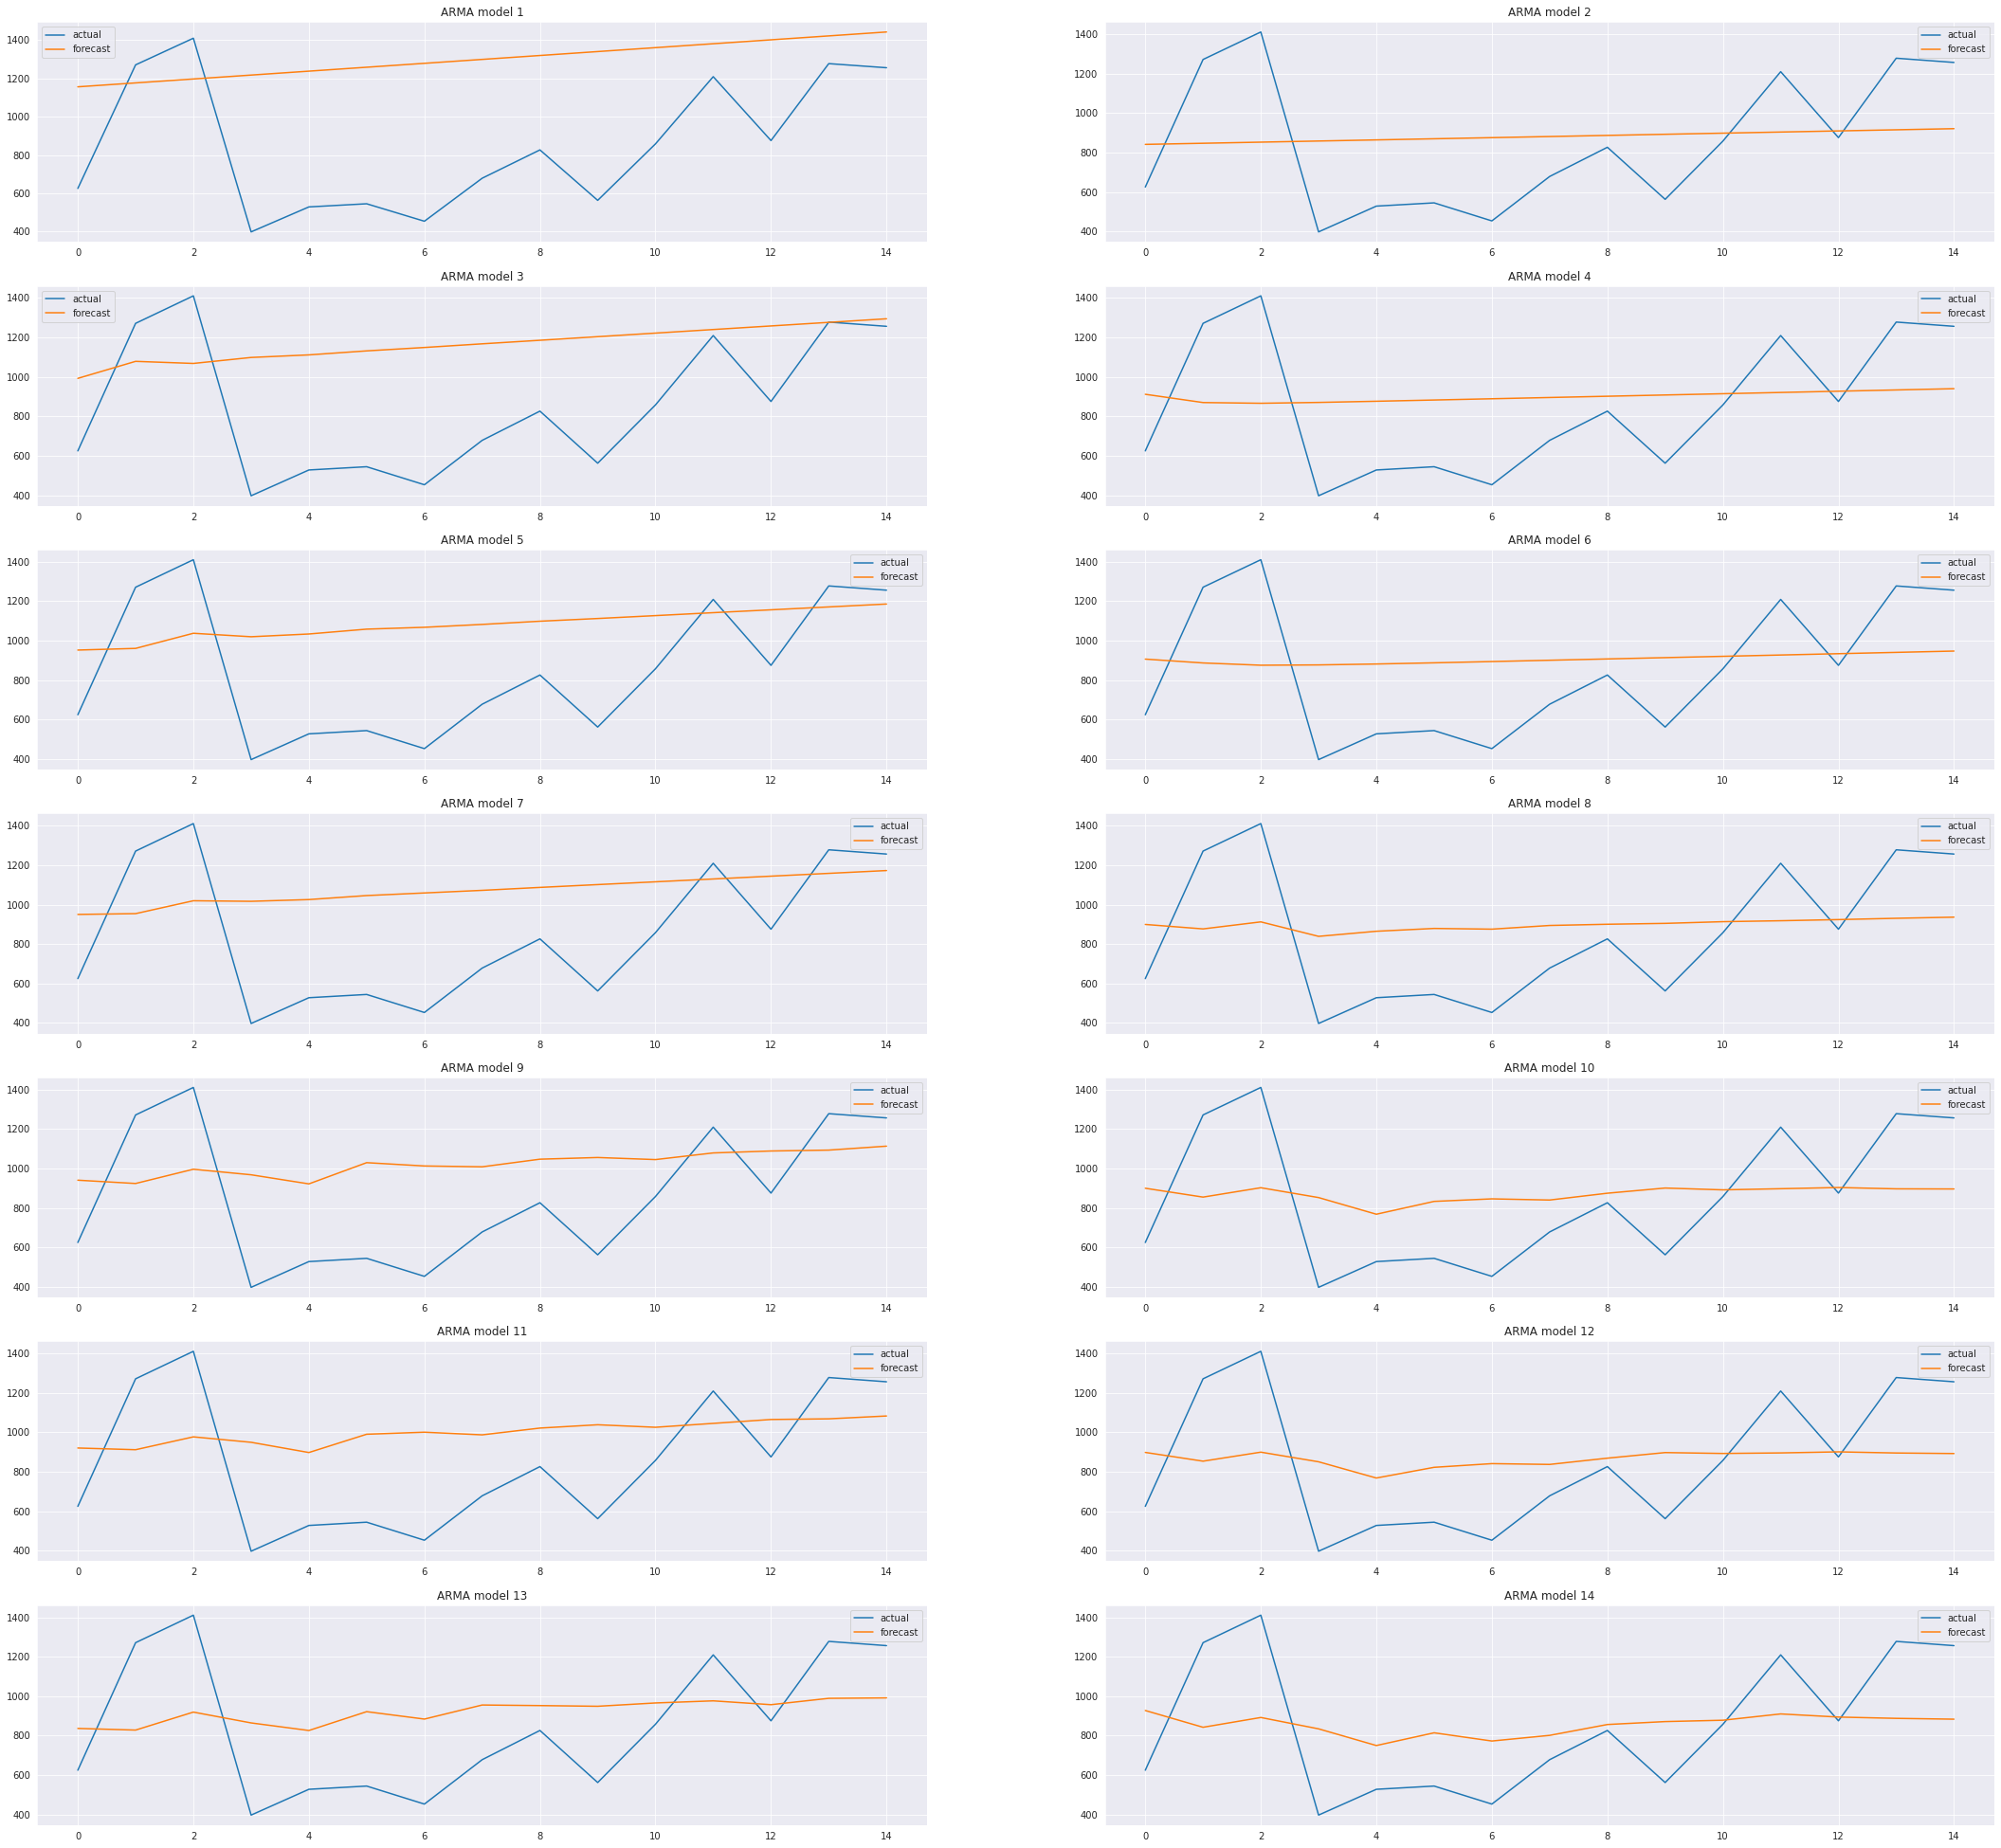

In [ ]:
c=1
for i in range(14):
  plt.subplot(7,2,c)
  list2[i].actual.plot(figsize=(37,35),legend=True)
  list2[i].forecast.plot(legend=True)
  plt.title("ARMA model "+str(c))
  c+=1

## SARIMA Model

SARIMA Model. p=0,q=0 
	MSE = 838128.2923110026 
	RMSE = 915.4934692891056
SARIMA Model. p=0,q=1 
	MSE = 651586.4804370161 
	RMSE = 807.2090686042967
SARIMA Model. p=1,q=0 
	MSE = 292054.7106365087 
	RMSE = 540.420864360832
SARIMA Model. p=1,q=1 
	MSE = 118632.57901918894 
	RMSE = 344.4308043993582
SARIMA Model. p=2,q=0 
	MSE = 157511.14919048658 
	RMSE = 396.876743070801
SARIMA Model. p=2,q=1 
	MSE = 111535.68525111127 
	RMSE = 333.9695873146405
SARIMA Model. p=3,q=0 
	MSE = 98342.50560988356 
	RMSE = 313.5960867260361
SARIMA Model. p=3,q=1 
	MSE = 54632.47631020856 
	RMSE = 233.73591146892375
SARIMA Model. p=4,q=0 
	MSE = 55151.12712752279 
	RMSE = 234.84277107784857
SARIMA Model. p=4,q=1 
	MSE = 72264.10832386804 
	RMSE = 268.8198436199754
SARIMA Model. p=5,q=0 
	MSE = 124251.19392489556 
	RMSE = 352.49282818930595
SARIMA Model. p=5,q=1 
	MSE = 63746.07360814823 
	RMSE = 252.47984792483584
SARIMA Model. p=6,q=0 
	MSE = 78965.98808293595 
	RMSE = 281.00887545224606
SARIMA Model. p=6,

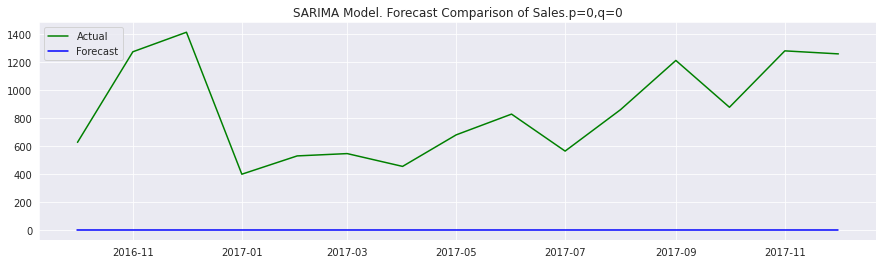

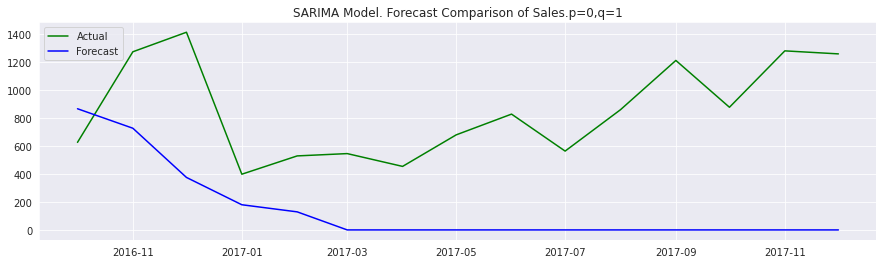

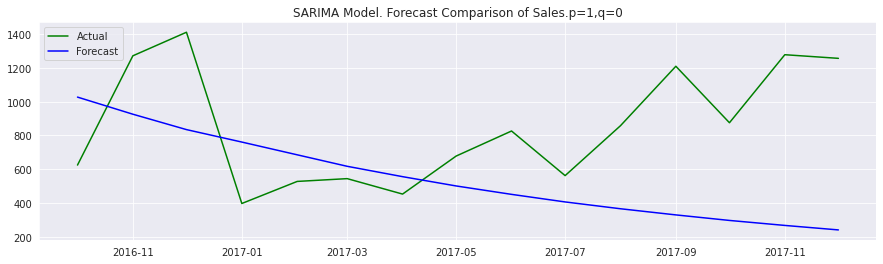

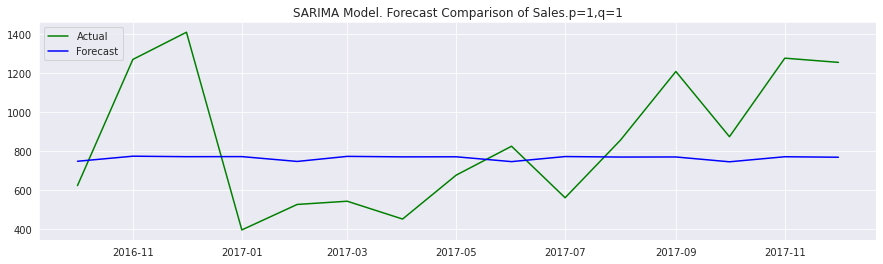

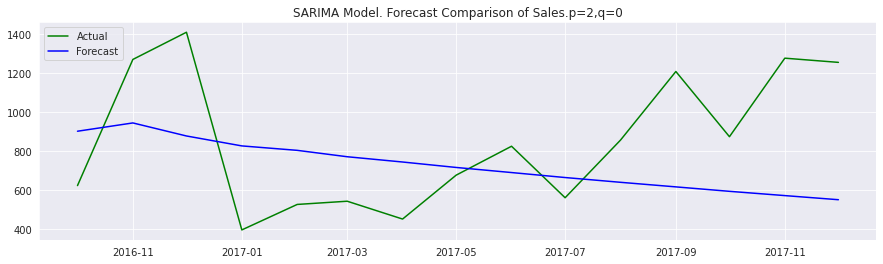

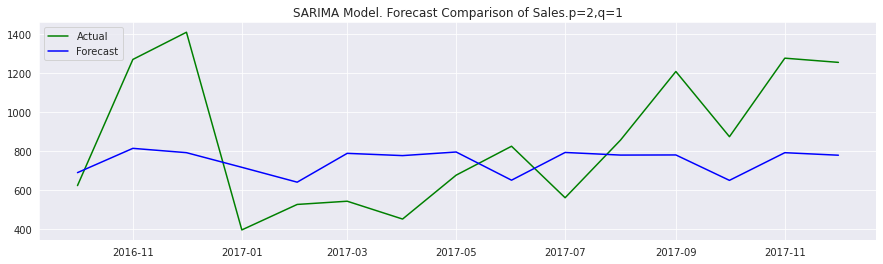

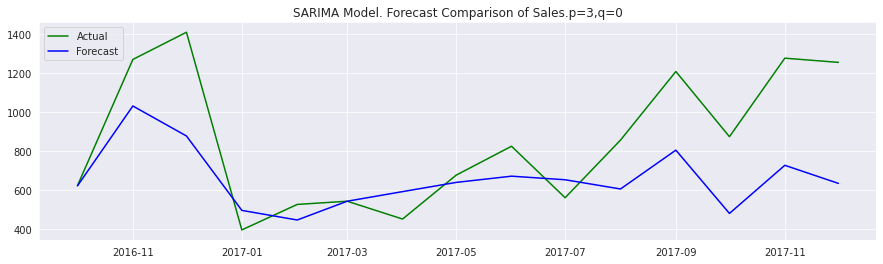

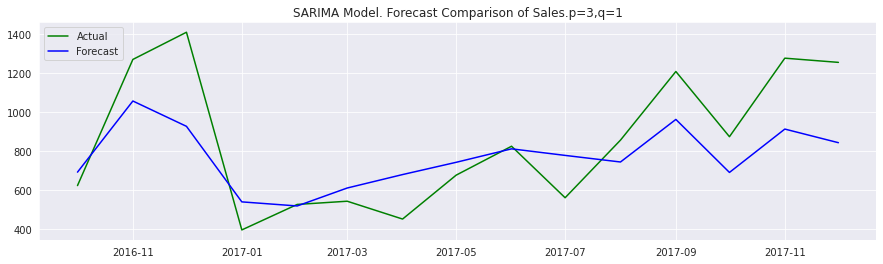

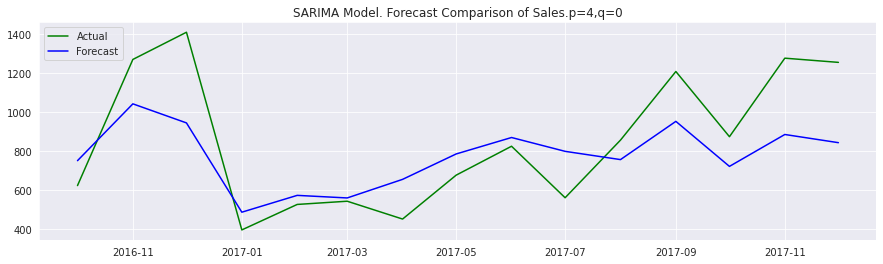

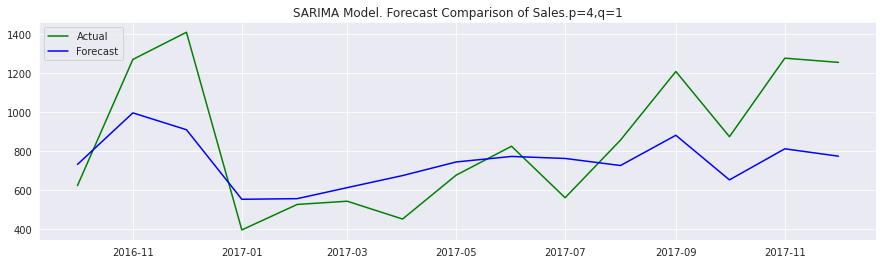

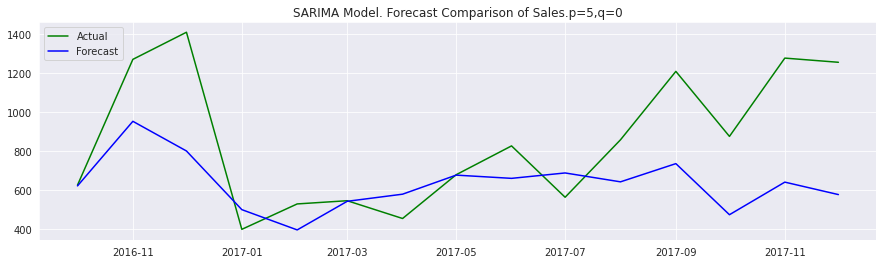

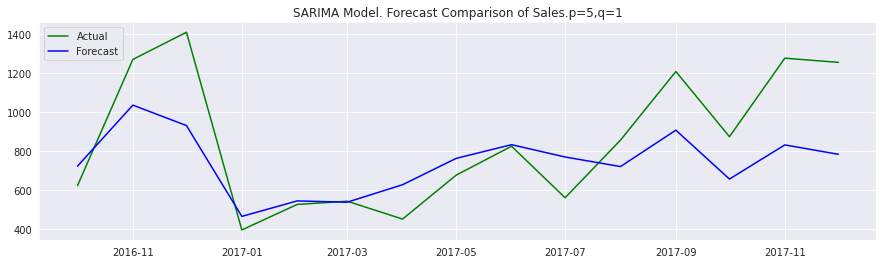

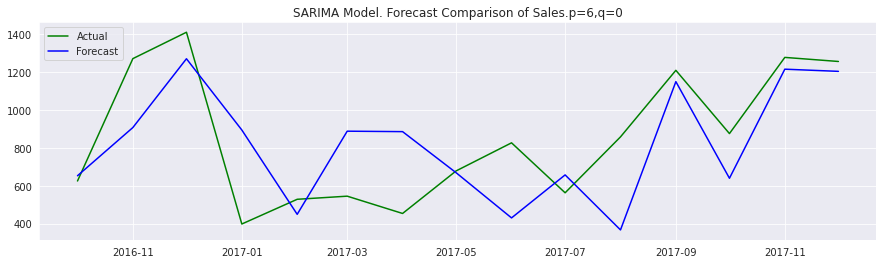

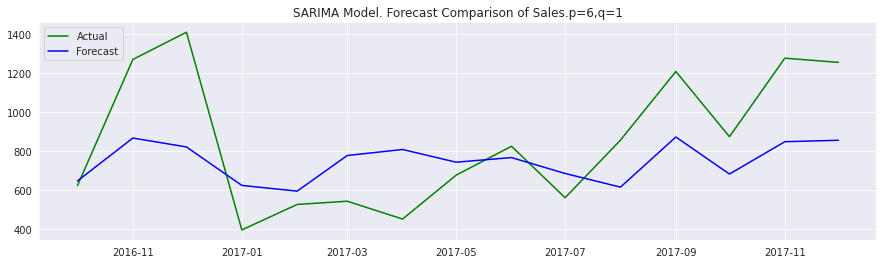

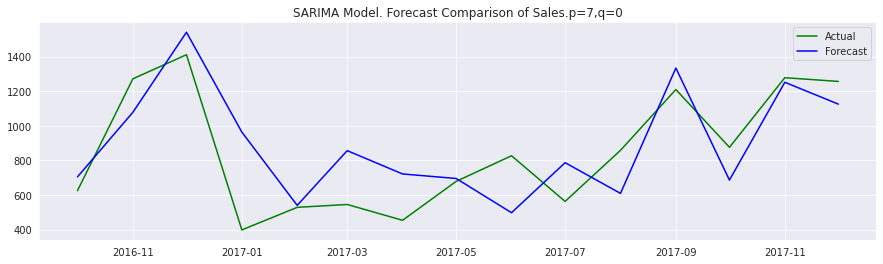

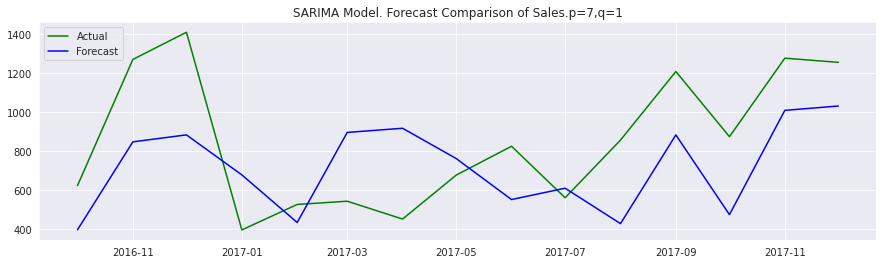

In [ ]:
l=[0,1,2,3,4,5,6,7]
l1 = [0,1]
d=0
P3 = []
Q3 = []
MSE3=[]
RMSE3 =[]
for i in l:
  for j in l1:
    P3.append(i)
    Q3.append(j)

    sm1 = SARIMAX(train,order=(i,d,j),seasonal_order=(i,d,j,4)).fit()

    f1 = sm1.forecast(len(test))

    # plot the actual and forecast data (SARIMA)
    plt.figure(figsize=(15,4))
    plt.plot(test,'g',label='Actual')
    plt.plot(f1,'b',label='Forecast')
    plt.legend()
    plt.title("SARIMA Model. Forecast Comparison of Sales.p={},q={}".format(i,j))

    # Calcualate the MSE and RMSE
    mse = mean_squared_error(test, f1)
    rmse = np.sqrt(mse)
    MSE3.append(mse)
    RMSE3.append(rmse)
    print("SARIMA Model. p={},q={} \n\tMSE = {} \n\tRMSE = {}".format(i,j,mse, np.sqrt(mse)))

In [ ]:
pd.DataFrame({'P': P3,'q':Q3,'MSE':MSE3,'RMSE':RMSE3})

,P,q,MSE,RMSE
0,0,0,838128.292311,915.493469
1,0,1,651586.480437,807.209069
2,1,0,292054.710637,540.420864
3,1,1,118632.579019,344.430804
4,2,0,157511.149190,396.876743
5,2,1,111535.685251,333.969587
6,3,0,98342.505610,313.596087
7,3,1,54632.476310,233.735911
8,4,0,55151.127128,234.842771
9,4,1,72264.108324,268.819844


## The least value is for p=3 and q=1 for SARIMA Model 

## SARIMAX Model 

In [ ]:
df_salesdata_2 = df_salesdata_1[['Sales','Quantity','Discount','Profit']]
df_salesdata3 = df_salesdata_2.groupby('Order Date')['Sales','Quantity','Discount','Profit'].sum()
df_salesdata3 = df_salesdata3.resample('MS').mean()
df_salesdata3

,Sales,Quantity,Discount,Profit
Order Date,,,,
2014-01-01,480.194231,5.384615,0.207692,61.958962
2014-02-01,367.931600,4.600000,0.160000,24.138340
2014-03-01,857.291529,7.705882,0.447059,-66.391471
2014-04-01,567.488357,5.785714,0.246429,39.598579
2014-05-01,432.049188,6.062500,0.384375,-21.867350
2014-06-01,695.059242,6.421053,0.248421,31.385016
2014-07-01,601.169500,6.333333,0.341667,20.791483
2014-08-01,457.521656,6.687500,0.196875,41.466981
2014-09-01,992.353367,8.666667,0.361250,77.441567


In [ ]:
rows = int(0.8 * len(df_salesdata2)); rows

train1 = df_salesdata3.iloc[:rows]
test1 = df_salesdata3.iloc[rows:]

In [ ]:
exog_train = train1[['Quantity','Discount','Profit']]
exog_test  = test1[['Quantity','Discount','Profit']]

In [ ]:
(len(exog_train), len(exog_test))

(38, 10)

SARIMAX Model 1. p=0,q=0 
	MSE = 33470.289486351416 
	RMSE = 182.94887123552147
SARIMAX Model 1. p=0,q=1 
	MSE = 28264.244861042233 
	RMSE = 168.1197337050063
SARIMAX Model 1. p=1,q=0 
	MSE = 31346.543918485047 
	RMSE = 177.04955215556194
SARIMAX Model 1. p=1,q=1 
	MSE = 29215.609628042497 
	RMSE = 170.92574302322777
SARIMAX Model 1. p=2,q=0 
	MSE = 28734.128301481007 
	RMSE = 169.51144003128817
SARIMAX Model 1. p=2,q=1 
	MSE = 29254.5538763866 
	RMSE = 171.0396266260734
SARIMAX Model 1. p=3,q=0 
	MSE = 29665.2525336781 
	RMSE = 172.2360372676929
SARIMAX Model 1. p=3,q=1 
	MSE = 28123.924133811972 
	RMSE = 167.7018906685669
SARIMAX Model 1. p=4,q=0 
	MSE = 26699.982874185847 
	RMSE = 163.40129397953325
SARIMAX Model 1. p=4,q=1 
	MSE = 26509.325552096074 
	RMSE = 162.81684664707174
SARIMAX Model 1. p=5,q=0 
	MSE = 31909.525977433274 
	RMSE = 178.632376621466
SARIMAX Model 1. p=5,q=1 
	MSE = 28843.52084061622 
	RMSE = 169.8338035863774
SARIMAX Model 1. p=6,q=0 
	MSE = 29489.589970298704 

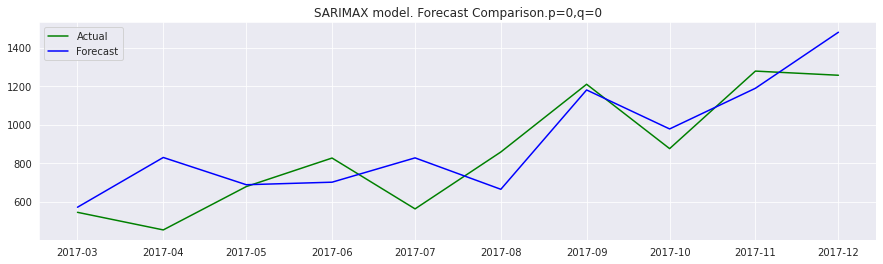

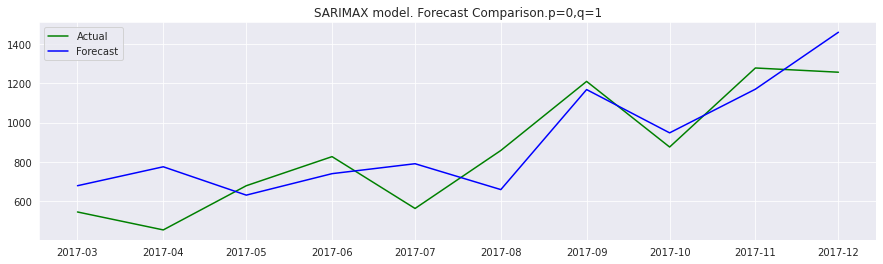

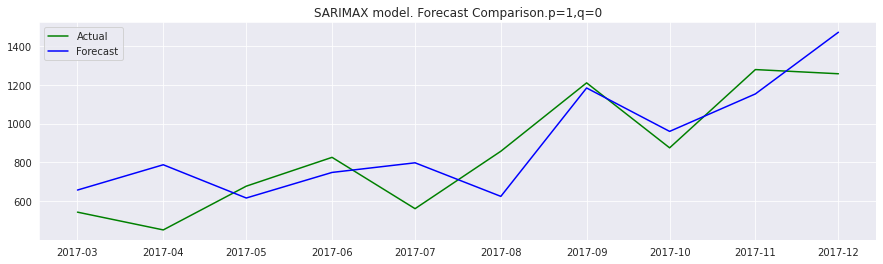

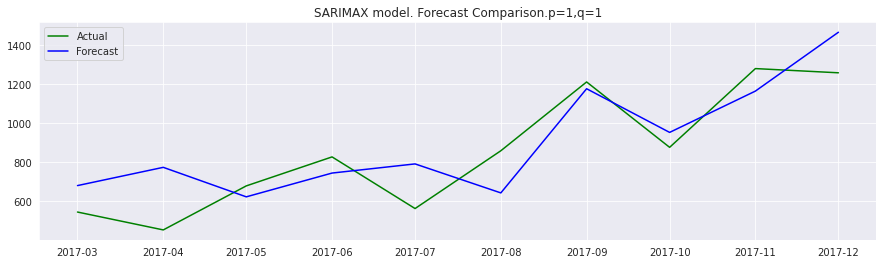

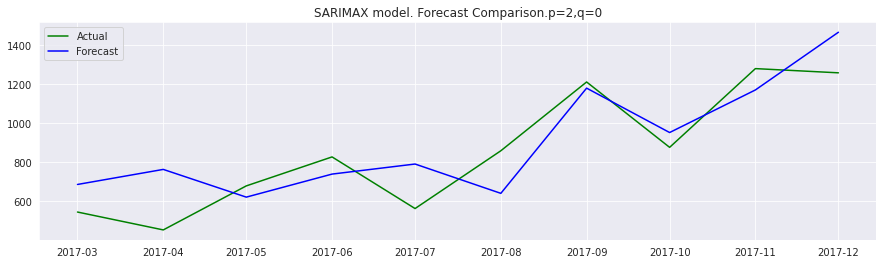

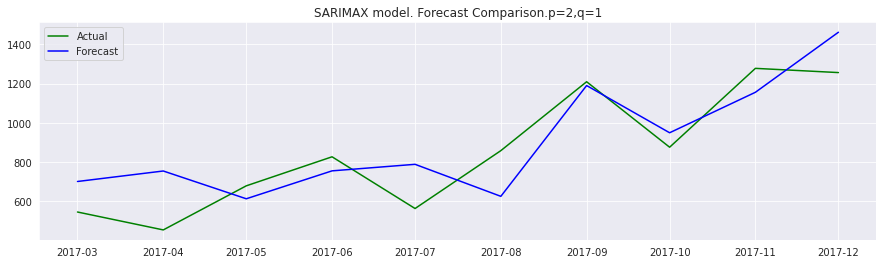

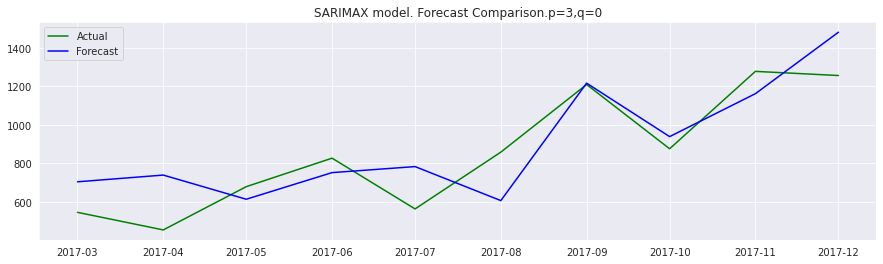

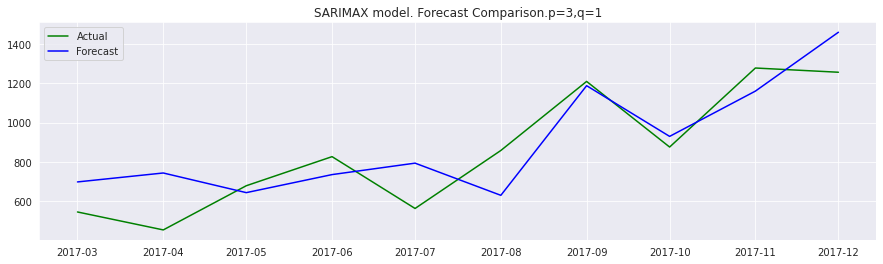

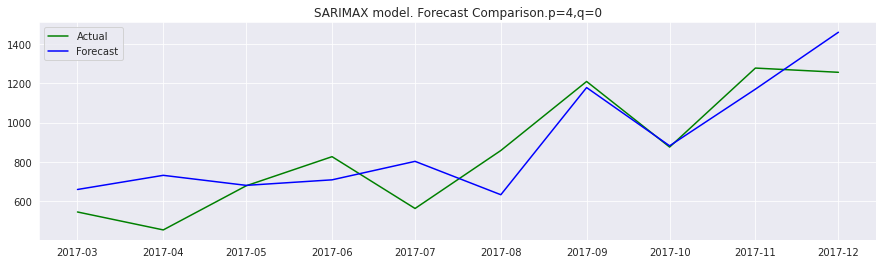

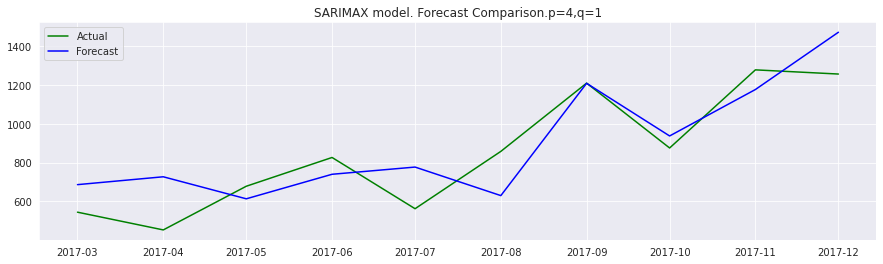

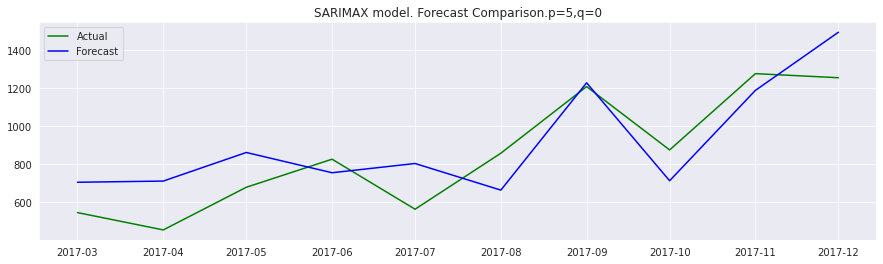

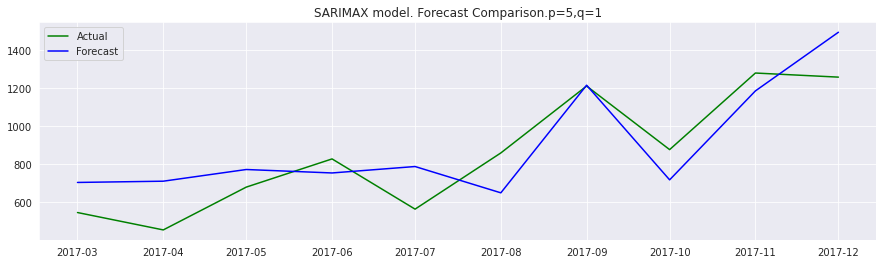

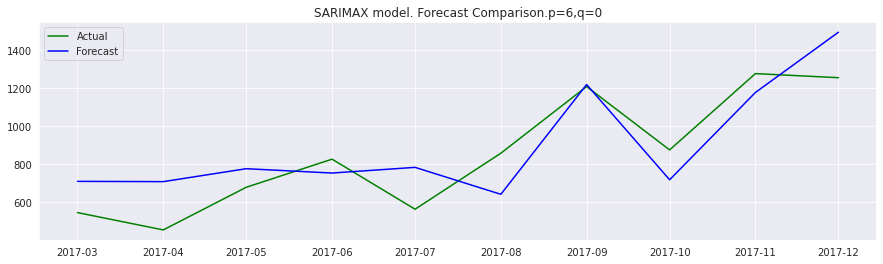

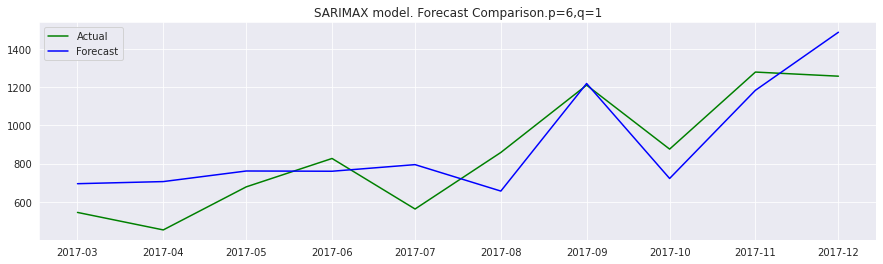

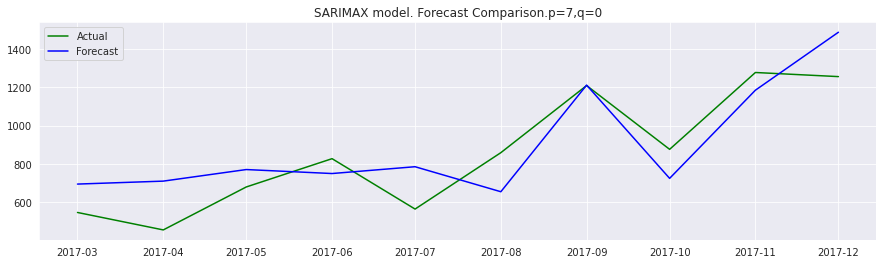

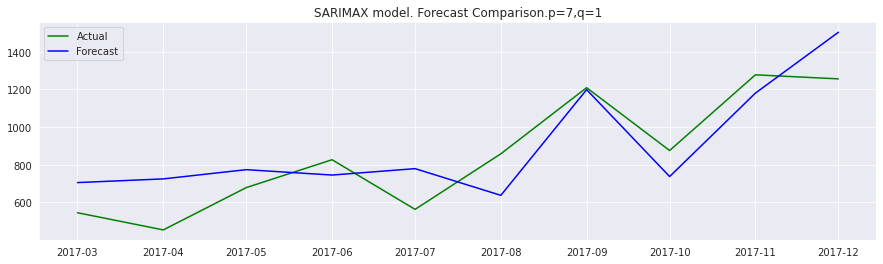

In [ ]:
l=[0,1,2,3,4,5,6,7]
l1 = [0,1]
d=0
P4 = []
Q4 = []
MSE4=[]
RMSE4 = []
for i in l:
  for j in l1:
    P4.append(i)
    Q4.append(j)

    m2 = SARIMAX(train1.Sales, order=(i,d,j),seasonal_order=(i,d,j,5), exog=exog_train.values).fit()

    f2 = m2.forecast(len(test1), exog=exog_test.values)

    mse2 = mean_squared_error(test1.Sales, f2)
    print("SARIMAX Model 1. p={},q={} \n\tMSE = {} \n\tRMSE = {}".format(i,j,mse2, np.sqrt(mse2)))

    # plot the actual and forecast data (SARIMAX)
    plt.figure(figsize=(15,4))
    plt.plot(test1.Sales,'g',label='Actual')
    plt.plot(f2,'b',label='Forecast')
    plt.legend()
    plt.title("SARIMAX model. Forecast Comparison.p={},q={}".format(i,j))

    MSE4.append(mse2)
    rmse = np.sqrt(mse2)
    RMSE4.append(rmse)

In [ ]:
pd.DataFrame({'P': P4,'q':Q4,'MSE':MSE4,'RMSE':RMSE4})

,P,q,MSE,RMSE
0,0,0,33470.289486,182.948871
1,0,1,28264.244861,168.119734
2,1,0,31346.543918,177.049552
3,1,1,29215.609628,170.925743
4,2,0,28734.128301,169.511440
5,2,1,29254.553876,171.039627
6,3,0,29665.252534,172.236037
7,3,1,28123.924134,167.701891
8,4,0,26699.982874,163.401294
9,4,1,26509.325552,162.816847


### The least value of MSE and RMSE for P=4 and q=1

## **Interpretation**:Forecasted values of SARIMAX model are better as compared to ARMA,ARIMA and SARIMA model.

## MSE and RMSE values are also less for SARIMAX model.